# Quy hoạch tuyến tính (linear program)

Tối ưu hóa được áp dụng trong nhiều lĩnh vực như sản xuất, kinh tế, tài chính, điều khiển, thống kê, giao thông, v.v…. Phần này xin giới thiệu về bài toán quy hoạch tuyến tính, một lĩnh vực quan trọng của tối ưu hóa.

# Bài toán quy hoạch tuyến tính

Bài toán tối ưu tổng quát có dạng như sau:
$$\begin{matrix}\text{Tìm minimize}\ f_0(x) \\ 
\text{thỏa}\ f_i(x)\leq b_i,\ i=1,2,..,m\end{matrix}$$
trong đó $x=(x_1,\ x_2,\ ...,\ x_n)\in \mathbb{R}^n$ là biến số. Hàm $f_0(x)$ được gọi là hàm mục tiêu. Có m ràng buộc trong bài toán tối ưu trên. Ràng buộc thứ i là $f_i(x)\leq b_i$.

Ta có thể đưa một bài toán tối ưu bất kỳ về dạng như trên. Nếu bài toán tối ưu là tối đa hóa hàm mục tiêu $f_0(x)$, ví dụ tối đa hóa lợi nhuận, thì ta có thể thay hàm mục tiêu bằng $\text{minimize}-f_0(x)$. Các ràng buộc cũng có thể đưa về dạng như trên.

# Một số ví dụ về quy hoạch tuyến tính

# Ví dụ 1:
$$\begin{matrix} \text{minimize} & f = x_1+x_2 \\
\text{thỏa} & x_1+2x_2\geq 2,\\
& 3x_1+x_2\geq 2,\\
& x_1\geq 0,\\
& x_2\geq 0\end{matrix}$$

In [7]:
import cvxpy as cp
import numpy as np
c = np.array([1,1])
A = np.array([[1,2],[3,1]])
b = np.array([2,2])
x = cp.Variable(2)
constraint = [A@x >= b, x>=0]

prob = cp.Problem(cp.Minimize(c.T @ x),constraint)
prob.solve()

print(prob.value)

1.1999999999710231


Hình 2 mô tả hàm mục tiêu và miền khả thi (feasible region) của bài toán trên giúp bạn đọc có cảm giác về nghiệm của bài toán tối ưu. Miền khả thi tức là tập hợp các điểm thỏa mãn các ràng buộc. Miền khả thi của một bài toán quy hoạch tuyến tính là một đa diện (polyhedron).

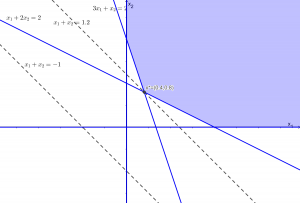

Biểu diễn hình học của hàm mục tiêu và các ràng buộc. Vùng tô màu là miền khả thi của bài toán trong Ví dụ 1. Nghiệm tối ưu là $f^*=1.2$, đạt được tại vector $x^*=(0.4,0.8)$.

# Ví dụ 2 – Bài toán dinh dưỡng

Để đảm bảo được dinh dưỡng, một người trung bình cần cho mỗi ngày:
<ul>
<li>Không ít hơn 200 gam chất bột đường (carbohydrate)</li>
<li>Không ít hơn 20 gam chất đạm (protein)</li>
</ul>

Hàm lượng dinh dưỡng các chất này trong 04 loại lương thực hiện có trong một cửa hàng trong 1000 gram được liệt kê ở bảng sau:

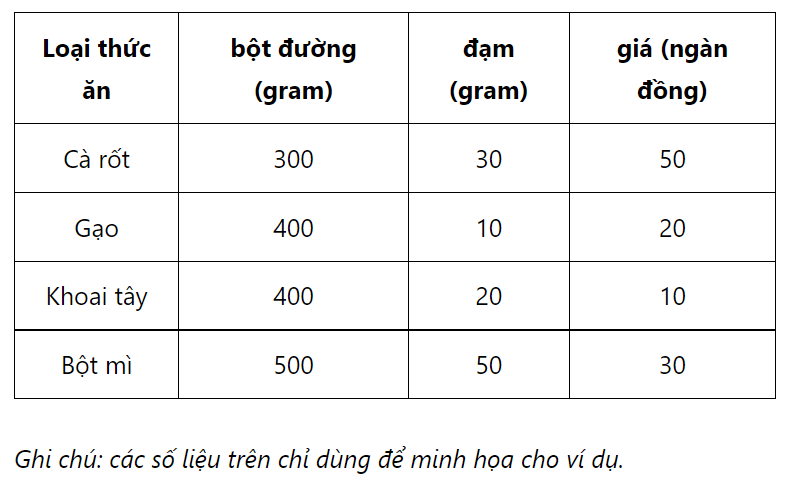

Như vậy người đó cần tối thiểu là bao nhiêu tiền đề đảm bảo được dinh dưỡng cho bữa ăn. Bài toán dinh dưỡng được mô hình dưới dạng bài toán quy doạch tuyến tính như sau: Gọi $x_c,x_g,x_k,x_b$ là số gram cà rốt, gạo, khoai tây và bột mì cần mua. Hàm mục tiêu là tổng số tiền:

$$50x_c+20x_g+10x_k+30x_b$$

Các ràng buộc bao gồm:
<ul>
<li>Đảm bảo về hàm lượng bột đường:
    $$300x_c+400x_g+400x_k+500x_b \geq 200$$
    </li>
<li>Đảm bảo về hàm lượng đạm:
    $$30x_c+10x_g+20x_k+50x_b\geq 20$$</li>
<li>Ngoài ra còn có ràng buộc không âm cho các biến:
    $$x_c\geq 0,\ x_g\geq 0,\ x_k\geq 0,\ x_b\geq 0$$</li>
</ul>

Như vậy, bài toán quy hoạch tuyến tính cho dinh dưỡng sẽ là:

# Giải bài toán quy hoạch tuyến tính bằng CVXPY solver

Có nhiều thư viện cho phép giải một bài toán quy hoạch tuyến tính. Sách này xin giới thiệu thư viện CVXPY dùng trong ngôn ngữ Python.

Đầu tiên chúng ta kiểm tra xem gói cvxpy đã được cài đặt chưa. Bật **Command Prompt** và gõ **pip install cvxpy**.

In [2]:
!pip install cvxpy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 802.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.1 MB 4.5 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.1 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/887.3 kB ? eta -:--:--
   --------------------------------------  880.6/887.3 kB 28.1 MB/s eta 0:00:01
   --------------------------------------- 887.3/887.3 kB 18.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.9 kB ? eta -:--:--
   --------------------------------------- 302.9/302.9 kB 18.3 MB/s eta 0:00:00
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [3]:
import cvxpy as cp
import numpy as np

c = np.array([50, 20, 10, 30])
A = np.array([[300, 400, 400, 500],[30, 10, 20, 50]])
b = np.array([200, 20])

x = cp.Variable(4)
constraint = [A@x >= b, x >=0]
prob = cp.Problem(cp.Minimize(c.T@x), constraint)
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)


The optimal value is 10.000000001714673
A solution x is
[-7.67211501e-12  3.37565841e-11  1.00000000e+00  1.60578968e-10]


Như vậy để đảm bảo dinh dưỡng, mua 1 kg khoai tây là tiết kiệm nhất (10 ngàn).

Bạn đọc nên tìm hiểu thêm cách sử dụng CVXPY tại https://www.cvxpy.org/tutorial/.

Chi tiết về gói **cvxpy** sẽ được đề cập ở một notebook riêng.

Variable((4,), var31)